# Taylors teorem, flere variabler 

Vi fokuserer på funksjoner $\mathbb{R}^n\rightarrow\mathbb{R}$. Særlig med $n=2$, men det har egentlig lite å si.

Vi skal altså finne tilnærminger

$$
f(x,y) = P_k(x,y) + R_{k+1}(x,y)
$$

hvor $P_k(x,y)$ er et polynom. Vi fokuserer bare på $k=1$ (lineærisering) og $k=2$.


## Linearisering

Et lineært polynom i 2 variabler tar formen

$$
P_1(x,y) = ax + by + c = c + \vec{a}\cdot\vec{x}, \quad 
\vec{a}=\begin{pmatrix}
a \\
b
\end{pmatrix}, \quad
\vec{x}=\begin{pmatrix}
x \\
y
\end{pmatrix}, 
$$

Den først ordens Taylor tilnærming, $\textit{lineariseringen}$, er

$$
f(\vec{x}) = f(\vec{x}_0) + \Big[\frac{Df}{D\vec{x}}(x_0)\Big](\vec{x}-\vec{x_0}) + R_2
$$

## Eksempel 1

La 

$$
f(x,y) = \sqrt{9-x^2-y^2} = (9-x^2-y^2)^{\frac{1}{2}} 
$$

Finn

1. Lineærisering rundt $(0,0)$
2. Lineærisering rundt $(2,2)$

I vårt eksempel er
$$
\frac{\partial f}{\partial x} = -x (9-x^2-y^2)^{\frac{-1}{2}}, \quad
\frac{\partial f}{\partial x} = -y (9-x^2-y^2)^{\frac{-1}{2}}
$$

1. Vi finner en lineær tilnærming rundt $x=0,y=0$. Der er $\frac{Df}{D\vec{x}} = \vec{0}$, slik at tilnærmingen blir konstant:

$$
f(x,y) \approx f(0,0) = 3
$$

2. Tar vi tilnærmingen rundt $x=y=2$ istedet, får vi $\frac{Df}{D\vec{x}} = (-2, -2)$, og

$$
f(x,y) \approx f(2,2) + (-2, -2)\begin{pmatrix}
x-2 \\
y-2
\end{pmatrix}
= 1 + -2(x-2) + -2(y-2) = 9 - 2x - 2y
$$


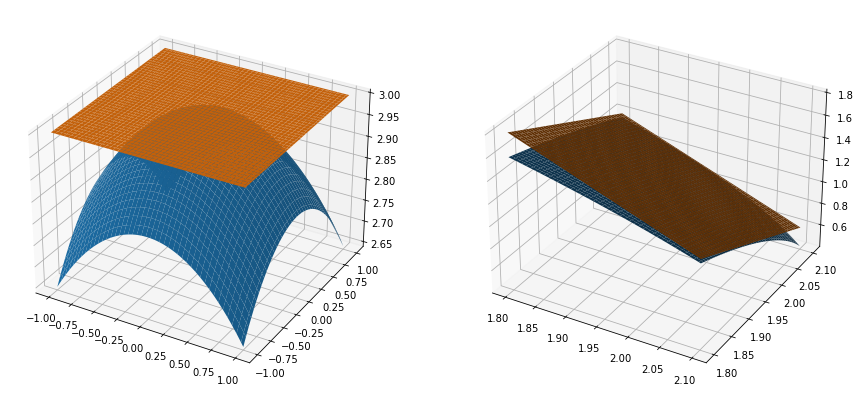

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#lag rutenettet på [-1,1]x[-1,1], brukes til venstre

X, Y = np.meshgrid(np.linspace(-1, 1, 256), np.linspace(-1, 1, 256))

#lag rutenettet på [1.8,2.1]x[1.8,2.1], brukes til høyre
# vi kutter av vi 2.1 siden funksjonen er ikke definert når x**2 + y**2 > 9

XX, YY = np.meshgrid(np.linspace(1.8, 2.1, 256), np.linspace(1.8, 2.1, 256))

# f(x,y) på rutenettet til venstre
Z1 = np.sqrt(9- X**2 - Y**2)

# lineærisering på rutenettet til venstre 
# 0*Y er et enkelt hack for å gi en array med samme dimensjoner som X, Y; ellers vil Z2=3 gi bare et skalar tall

Z2 = 3 + 0*Y

# f(x,y) på rutenettet til høyre
ZZ1 = np.sqrt(9- XX**2 - YY**2)

# lineærisering på rutenettet til høyre
ZZ2 = 9 - 2*XX - 2*YY

# lag figuren
fig,(ax1, ax2) = plt.subplots(1,2, subplot_kw ={"projection":"3d"}, figsize=(15,15))

# til venstre viser vi lineærisering rundt origo, innenfor [-1,1]x[-1,1]
# plotter f(x,y) i blå  
ax1.plot_surface(X, Y, Z1)
# plotter lineærisering i oransje
ax1.plot_surface(X, Y, Z2)

# til høyre viser vi lineærisering rundt x=y=2, innenfor [1.8,2.1]x[1.8,2.1]
# plotter f(x,y) i blå
ax2.plot_surface(XX, YY, ZZ1)
# plotter lineærisering i oransje, ser ganske brunt grunnet kort avstand til den blå overflaten
ax2.plot_surface(XX, YY, ZZ2)

plt.show()

## Andreordens

Et andregradens polynom i to dimensjoner tar formen

$$
P_2(x,y) = \vec{x}^T A \vec{x} + \vec{b}\cdot\vec{x} + c,
$$

for en gitt matrise $A$, vektor $b$ og skalar $c$.

Den andregrads Taylor utvikling er

$$
f(\vec{x}) = f(\vec{x}_0) + \Big[\frac{Df}{D\vec{x}}(x_0)\Big](\vec{x}-\vec{x_0}) + \frac{1}{2}(\vec{x}-\vec{x}_0)^T \Big[\frac{D^2f}{D\vec{x}^2}(\vec{x_0})\Big] (\vec{x}-\vec{x_0})  + R_3,
$$

hvor vi husker at $\frac{Df}{D\vec{x}}$ er en vektor, og $\frac{D^2f}{D\vec{x}^2}$ er en matrise (Hessematrisen).

## Eksempel 2

Vi fortsetter med samme funksjon $f(x,y) = \sqrt{9-x^2-y^2}$ som eksempel 1.

Vi har
$$
\begin{align}
\frac{\partial^2 f}{\partial x^2} &= -(9-x^2-y^2)^{\frac{-1}{2}} - x^2 (9-x^2-y^2)^{\frac{-3}{2}} \\
\frac{\partial^2 f}{\partial x\partial y} &= -xy (9-x^2-y^2)^{\frac{-3}{2}} \\
\frac{\partial^2 f}{\partial x^2} &= -(9-x^2-y^2)^{\frac{-1}{2}} - y^2 (9-x^2-y^2)^{\frac{-3}{2}}
\end{align}
$$

Da er
$$
\frac{Df}{D\vec{x}}(0,0) = \begin{pmatrix}
-9^{\frac{-1}{2}} & 0 \\
0  & -9^{\frac{-1}{2}}
\end{pmatrix}
=
\begin{pmatrix}
-\frac{1}{3} & 0 \\
0 & -\frac{1}{3}
\end{pmatrix}
$$

Den andreordens tilnærmingen rundt $x=0, y=0$ blir da

$$
f(x,y) \approx f(0,0) + (x,y)\begin{pmatrix}
-\frac{1}{3} & 0 \\
0 & -\frac{1}{3}
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
= 3 - \frac{1}{3}x^2 - \frac{1}{3}y^2
$$

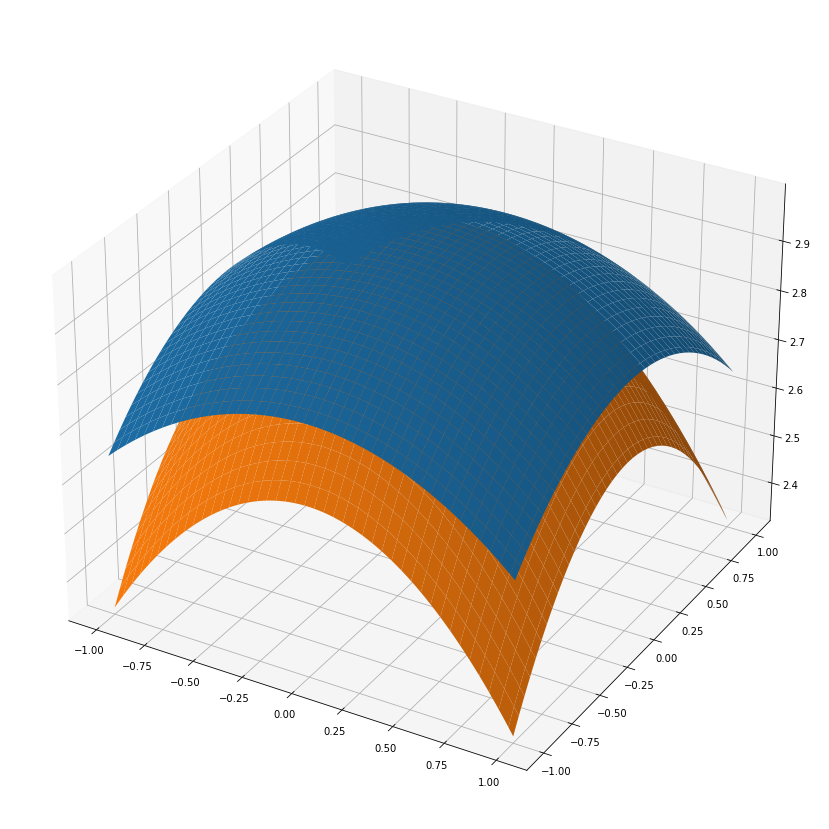

In [15]:
# bruker samme rutenett på [-1,1]x[1,1] som i forrige eksempel
# X og Y er også uendret

# den andreordens taylor tilnærming rundt origo
Z3 = 3 - (1/3)*(X**2 + Y**2)

# lager figuren
fig, ax = plt.subplots(subplot_kw ={"projection":"3d"}, figsize=(15,15))

# plotter f(x,y) i blå - Z1 er altså samme som før
ax.plot_surface(X, Y, Z1)
# plotter den andre ordens taylor tilnærming rundt origo i oransje
ax.plot_surface(X, Y, Z3)

## Kritiske punkter (kommentar)

Når ser vi hvorfor kritiske punkter er sånn vi har beskrevet! I et kritisk punkt er $\frac{Df}{D\vec{x}} = \vec{0}$, slik at

$$
f(\vec{x}) = f(\vec{x}_0) + \frac{1}{2}(\vec{x}-\vec{x}_0)^T \Big[\frac{D^2f}{D\vec{x}^2}(\vec{x_0})\Big] (\vec{x}-\vec{x_0})  + R_3,
$$
altså funksjonen kan tilnærmes av en av de tre variantene fra forrige uke.

## Restledd og nøyaktighet

[ikke pensum]

La oss skrive den generelle formen sånn:

$$
f(\vec{x})=f(\vec{x_0}) + \Big[\frac{Df}{D\vec{x}}(\vec{x}_0)\Big](\vec{x}-\vec{x}_0) + \ldots 
+ \frac{1}{n!}\Big[\frac{D^n f}{D\vec{x}^n}(\vec{x}_0)\Big] (\vec{x}-\vec{x}_0,\ldots,\vec{x}-\vec{x}_0)
+ \frac{1}{(n+1)!}\Big[\frac{D^{n+1} f}{D\vec{x}^{n+1}}(\vec{a})\Big] (\vec{x}-\vec{x}_0,\ldots,\vec{x}-\vec{x}_0)
$$

Her er $\vec{a}$ in vector som er minst like nært $\vec{x}_0$ som $\vec{x}$.

Vi forstår den deriverte $D^n f (x;h_1,\ldots,h_n)$ som en funksjon som tar en posisjon $\vec{x}$ og $n$ retninger $h_1,\ldots,h_n$. I Taylors teorem er hver retning $\vec{x}-\vec{x}_0$.

## Eksempel 3: restledd i lineærisering

La oss se ta en titt på lineærisering av funksjonen $f(x,y) = \sqrt{9-x^2-y^2}$ rundt origoen. Restleddet er altså

$$
R_2 = (x,y)
\begin{pmatrix}
-(9-a^2-b^2)^{\frac{-1}{2}} - a^2 (9-a^2-b^2)^{\frac{-3}{2}} & -ab (9-a^2-b^2)^{\frac{-3}{2}} \\
-ab (9-a^2-b^2)^{\frac{-3}{2}} & -(9-a^2-b^2)^{\frac{-1}{2}} - b^2 (9-a^2-b^2)^{\frac{-3}{2}}
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

Ikke spesielt pent! 